## Programming the Game

In [84]:
import random
import numpy as np
from scipy import stats
from tqdm import tqdm
import matplotlib.pyplot as plt

# Function to simulate the hat numbers problem
def hat_numbers(n=2025, verbose=False):
    # List of numbers 1 to n inclusive
    nums = list(range(1, n+1))
    
    # If verbose, we print the starting list
    if verbose:
        print(f"Starting list: S_0 = {nums}")
    
    # Track iteration number
    iter_num = 1
    # Repeat until we have only one number left, bounding the number of iterations to prevent infinite loops
    while len(nums) > 1 and iter_num < n + 1:
        # Sample two distinct numbers a and b from nums
        a, b = random.sample(list(nums), 2)
        # Remove a and b from nums
        nums.remove(a)
        nums.remove(b)
        # Append |a-b| to nums
        nums.append(abs(a-b))
        
        # If verbose, we print the numbers and the current list
        if verbose:
            print(f"{a}, {b} -> {abs(b-a)}")
            print(f"Current list: S_{iter_num} = {nums}")

        # Increment the iteration number
        iter_num += 1
        
    # Get the final number
    final_num = nums.pop()
    # If verbose, we print the final number
    if verbose:
        print(f"Final number: {final_num}")

    # Return the final number, or an error message if an error has occurred
    return final_num if len(nums) == 0 else 'Error has occurred, length of final set larger than 1.'      
        
    
# Test game
print("n=2025:")
print(hat_numbers(2025))
print("-----")
print("n=5 verbose:")
print(hat_numbers(5, verbose=True))

n=2025:
145
-----
n=5 verbose:
Starting list: S_0 = [1, 2, 3, 4, 5]
1, 4 -> 3
Current list: S_1 = [2, 3, 5, 3]
3, 5 -> 2
Current list: S_2 = [2, 3, 2]
3, 2 -> 1
Current list: S_3 = [2, 1]
2, 1 -> 1
Current list: S_4 = [1]
Final number: 1
1


In [240]:
# Function to run simulations of the game and get the results
def hat_numbers_sim(n=2025, num_iter=1000, verbose=False):
    # List to store the results of the simulations
    results = []
    for _ in tqdm(range(num_iter)):
        # Append final number
        results.append(hat_numbers(n, verbose))
        
    # Return the results as a list
    return results

# Test
print("Simulation results for 10 iterations with n=5:")
print(hat_numbers_sim(5, num_iter=10))

Simulation results for 10 iterations with n=5:


100%|██████████| 10/10 [00:00<00:00, 19737.90it/s]

[3, 3, 1, 1, 3, 3, 1, 1, 3, 1]


100%|██████████| 1000/1000 [00:00<00:00, 3927.68it/s]


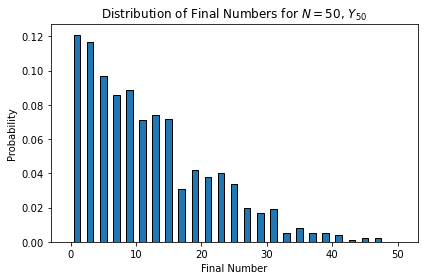

In [243]:
# Function to run and plot a simulation
def plot_sim(n):
    # Run a simulation with at least a 1000 results (10*n ensures we have plenty of results for larger N)
    sim_results = hat_numbers_sim(n, num_iter=max(10*n, 1000))
    # Center the bins around integers
    bins = np.arange(0, n+2) - 0.5 if len(np.arange(0, n+2) - 0.5) <= 100 else 100
    # Plot a histogram of the results
    plt.hist(sim_results, density=True, bins=bins, edgecolor='black')  # Ensures integer bins
    plt.xlabel("Final Number")
    plt.ylabel("Probability")
    plt.title(f"Distribution of Final Numbers for $N={n}$, $Y_{{{n}}}$")
    
    # I set xticks to this for most of my graphs for lower N
    # plt.xticks(range(1, n + 1, 2))
    
    plt.tight_layout()
    plt.show()
    
# Test
plot_sim(50)

In [41]:
# Function to get unique final numbers
def unique_nums(n=2025, num_iter=1000):
    results = hat_numbers_sim(n, num_iter)
    # Return only the unique final numbers
    return list(set(results))

# Look at the unique numbers in our results
print("n=3")
print(unique_nums(3))
print("n=4")
print(unique_nums(4))
print("n=5")
print(unique_nums(5))
print("n=10")
print(unique_nums(10))
print("n=20")
print(unique_nums(20))
print("n=50")
print(unique_nums(50))

n=3
[0, 2]
n=4
[0, 2, 4]
n=5
[1, 3, 5]
n=10
[1, 3, 5, 7, 9]
n=20
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
n=50
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 47]


100%|██████████| 1000/1000 [00:00<00:00, 55099.04it/s]


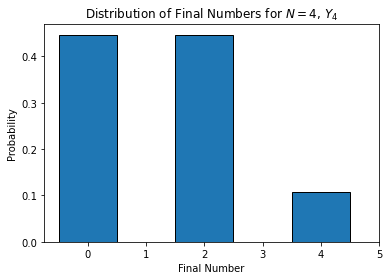

[0, 2, 4]

In [43]:
# n=4 case
n=4
plot_sim(n)
unique_nums(n)

## Checking Conjectures

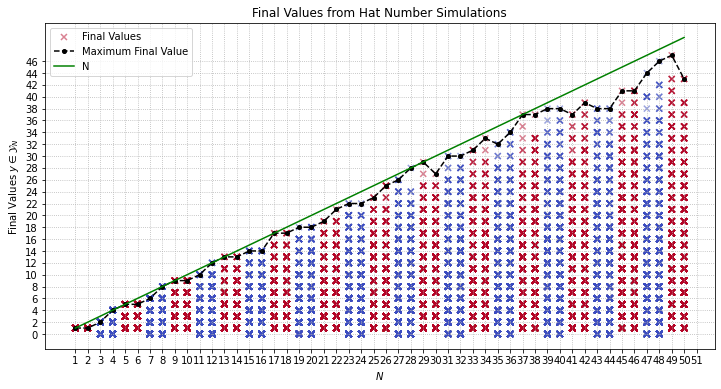

In [79]:
# Check conjecture 1
# Function to plot all final values for N up to N_max
def plot_final_values(N_max):
    # List to store largest final values from each simulation
    top_values = []
    # Dictionary to store simulation results for each N
    all_sim_results = {}

    # Iterate over 1 to N_max inclusive
    for N in range(1, N_max + 1):
        # Get simulation results for N
        sim_results = hat_numbers_sim(N, num_iter=max(10*n, 1000))
        # Add results to the dictionary
        all_sim_results[N] = sim_results
        # Append the largest final value
        top_values.append(max(sim_results))

    # Lists for the N values and final values
    N_values = []
    final_values = []

    # Get values from the dictionary and put them into the lists
    for N, results in all_sim_results.items():
        N_values.extend([N] * len(results)) 
        final_values.extend(results)

    # Plot the final values against the N values, coloring them based on whether they are odd or even
    plt.figure(figsize=(12, 6))
    plt.scatter(N_values, final_values, alpha=0.5, c=np.array(final_values) % 2, cmap="coolwarm", label="Final Values", marker='x')

    # Plot the largest final values and line y=N
    plt.plot(range(1, N_max + 1), top_values, color='black', linestyle='dashed', marker='o', markersize=4, label="Maximum Final Value")
    plt.plot(range(1, N_max + 1), range(1, N_max + 1), color='green', label="N")

    plt.xlabel("$N$")
    plt.ylabel("Final Values $y \\in \\mathcal{Y}_N$")
    plt.title("Final Values from Hat Number Simulations")

    # Show only integer ticks on x-axis
    size = max(int(min([N_max / 30, 30])),1)
    plt.xticks(range(1, N_max + 1, size))

    # Show only even numbers on y-axis
    min_y = min(final_values)
    max_y = max(final_values)
    plt.yticks(range(min_y + (min_y % 2), max_y + 1, 2))  # Ensures only even y-ticks

    plt.grid(True, linestyle="dotted")
    plt.legend()
    plt.show()
    
plot_final_values(50)

100%|██████████| 100/100 [06:45<00:00,  4.06s/it]


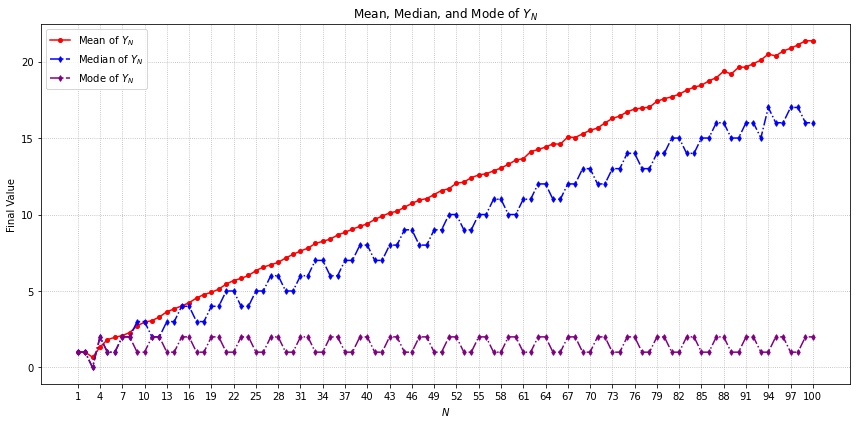

In [122]:
# Function to plot the means, medians, and modes up to N_max
def plot_means_vs_medians_vs_modes(N_max, step=20):
    # Lists to store the means, medians, and modes
    mean_values = []
    median_values = []
    mode_values = []

    # Iterate over 1 to N_max inclusive
    for N in tqdm(range(1, N_max + 1, step)):
        # Get simulation results for N
        sim_results = hat_numbers_sim(N, num_iter=max(10*n, 1000))
        # Append the mean, median, and mode for the simulation results
        mean_values.append(np.mean(sim_results))
        median_values.append(np.median(sim_results))
        mode_values.append(stats.mode(sim_results).mode[0])

    plt.figure(figsize=(12, 6))
    # Plot means, medians, and modes against N
    plt.plot(range(1, N_max + 1, step), mean_values, color='red', linestyle='solid', marker='o', markersize=4, label="Mean of $Y_N$")
    plt.plot(range(1, N_max + 1, step), median_values, color='blue', linestyle='dashdot', marker='d', markersize=4, label=r"Median of $Y_N$")
    plt.plot(range(1, N_max + 1, step), mode_values, color='purple', linestyle='dashdot', marker='d', markersize=4, label=r"Mode of $Y_N$")

    # Labels and title
    plt.xlabel("$N$")
    plt.ylabel("Final Value")
    plt.title("Mean, Median, and Mode of $Y_N$")

    # Show only integer ticks on x-axis
    size = max(int(min([N_max / 30, 30])),1)
    plt.xticks(range(1, N_max + 1, size))
    plt.grid(True, linestyle="dotted")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Create the plot
plot_means_vs_medians_vs_modes(100, step=1)

## Regression for Expected Final Values

In [ ]:
import statsmodels.api as sm

# Get the data for the regression model ()
N_max = 1801
step = 50
new_mean_values = []

for N in tqdm(range(1, N_max + 1, step)):
    new_sim_results = hat_numbers_sim(N, num_iter=max(10*n, 1000))
    new_mean_values.append(np.mean(new_sim_results))

In [202]:
# Save the data
# DO NOT JUST RUN THIS IT WILL OVERWRITE DATA
#np.savetxt("mean_values.csv", np.array(new_mean_values), delimiter=",", fmt="%d")

#import csv

# Append data to the csv
#with open("mean_values.csv", mode="a", newline="") as file:
#    writer = csv.writer(file)
    
#    for entry in new_mean_values:
#        writer.writerow([entry]) 


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.656e+04
Date:                Sat, 15 Feb 2025   Prob (F-statistic):           2.84e-56
Time:                        19:14:32   Log-Likelihood:                -85.445
No. Observations:                  37   AIC:                             174.9
Df Residuals:                      35   BIC:                             178.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3496      0.808      9.098      0.0

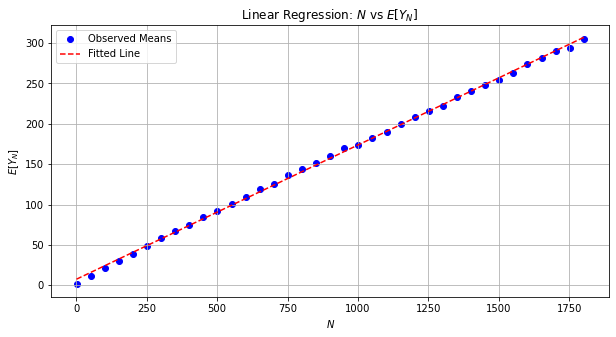

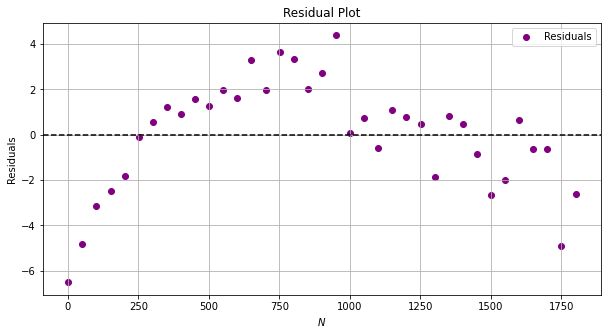

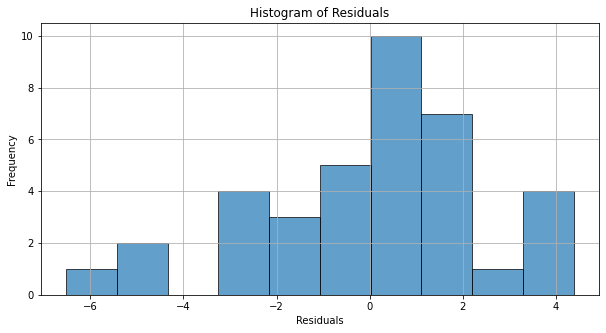

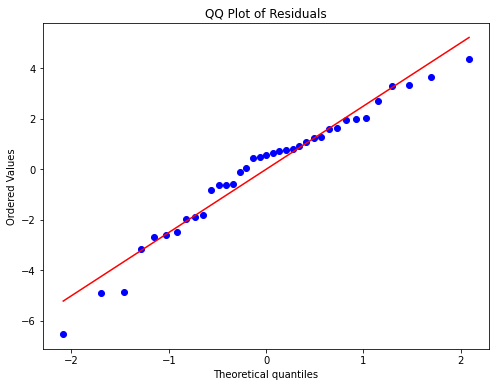

In [205]:
# Import means data from csv
new_mean_values = np.loadtxt("mean_values.csv", delimiter=",")

# Get the N values and convert mean array into a numpy array
new_N_values = np.arange(1, 1850+1, step)
new_mean_values = np.array(new_mean_values)

# Fit linear regression model and predict mean values
X = sm.add_constant(new_N_values)
new_model = sm.OLS(new_mean_values, X).fit()
new_predictions = new_model.predict(X)

# Extract residuals
new_residuals = new_mean_values - new_predictions

# Print regression summary
print(new_model.summary())

# Plot 1: Scatter plot with regression line
plt.figure(figsize=(10, 5))
plt.scatter(new_N_values, new_mean_values, color='blue', label="Observed Means")
plt.plot(new_N_values, new_predictions, color='red', linestyle="dashed", label="Fitted Line")
plt.xlabel("$N$")
plt.ylabel("$E[Y_N]$")
plt.title("Linear Regression: $N$ vs $E[Y_N]$")
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Residual plot
plt.figure(figsize=(10, 5))
plt.scatter(new_N_values, new_residuals, color='purple', label="Residuals")
plt.axhline(0, color='black', linestyle="dashed")
plt.xlabel("$N$")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Histogram of residuals
plt.figure(figsize=(10, 5))
plt.hist(new_residuals, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.grid(True)
plt.show()

# Plot 4: QQ plot for residuals (check normality)
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(new_residuals, dist="norm", plot=ax)
ax.set_title("QQ Plot of Residuals")
plt.show()


## Exploring the N=2025 case

In [ ]:
# Get simulation results for N=2025
n = 2025
sim_results = hat_numbers_sim(n, num_iter=max(10*n, 1000), verbose=True)

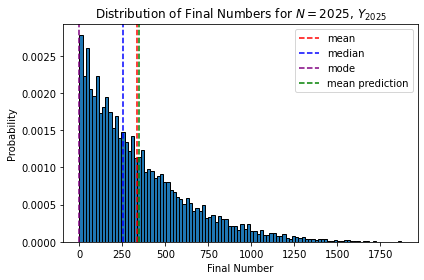

In [207]:
# Function to plot a histogram of the simulation results along with their mean, median, mode, and predicted mean from the regression model
def plot_sim_with_stats(sim_results):
    # Plot histogram of the simulation results
    bins = np.arange(0, n+2) - 0.5 if len(np.arange(0, n+2) - 0.5) <= 100 else 100
    plt.hist(sim_results, density=True, bins=bins, edgecolor='black')  # Ensures integer bins
    plt.xlabel("Final Number")
    plt.ylabel("Probability")
    plt.title(f"Distribution of Final Numbers for $N={n}$, $Y_{{{n}}}$")
    
    # Get mean, median, mode, and mean prediction
    mean = np.mean(sim_results)
    median = np.median(sim_results)
    mode = stats.mode(sim_results).mode[0]
    mean_prediction = new_model.predict([1,n])
    
    # Plot mean, median, mode, and mean prediction
    plt.axvline(mean, label='mean', color='red', linestyle='--')
    plt.axvline(median, label='median', color='blue', linestyle='--')
    plt.axvline(mode, label='mode', color='purple', linestyle='--')
    plt.axvline(mean_prediction, label='mean prediction', color='green', linestyle='--')
       
    plt.legend()
    plt.tight_layout()
    plt.show()
    
# Test
plot_sim_with_stats(sim_results)

In [208]:
# Check whether final values are odd
unique_final_values = list(set(sim_results))

print(unique_final_values)

print("All odd" if sum(0 if k % 2 == 1 else 1 for k in unique_final_values) == 0 else "Not all odd")

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233, 235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259, 261, 263, 265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285, 287, 289, 291, 293, 295, 297, 299, 301, 303, 305, 307, 309, 311, 313, 315, 317, 319, 321, 323, 325, 327, 329, 331, 333, 335, 337, 339, 341, 343, 345, 347, 349, 351, 353, 355, 357, 359, 361, 363, 365, 367, 369, 371, 373, 375, 377, 379, 381, 383, 385, 387, 389, 391, 393, 395, 397, 399, 401, 403, 405, 407, 409, 411, 413, 415, 417, 419, 421,

In [210]:
print(np.mean(sim_results))
print(stats.mode(sim_results).mode[0])

336.61916049382717
1


## Final Check - N=125 case

100%|██████████| 10000/10000 [00:05<00:00, 1692.72it/s]


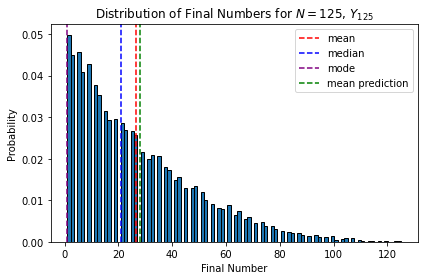

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 123, 125]
All odd
26.5944
1


In [217]:
# Final check
n = 125
check_sim_results = hat_numbers_sim(n, num_iter=10000, verbose=True)

plot_sim_with_stats(check_sim_results)

# Check whether final values are odd
unique_final_values = list(set(check_sim_results))

print(unique_final_values)

print("All odd" if sum(0 if k % 2 == 1 else 1 for k in unique_final_values) == 0 else "Not all odd")

print(np.mean(check_sim_results))
print(stats.mode(check_sim_results).mode[0])

## Extensions

In [251]:
# This function is the same as hat_numbers() but uses a set rather than a list to store the numbers in the hat
# Function to simulate the game
def hat_numbers_unique(n=2025, verbose=False):
    # Create a **set** of numbers from 1 to n inclusive
    nums = set(range(1, n+1))
    
    if verbose:
        print(f"Starting list: S_0 = {nums}")
    
    iter_num = 1

    while len(nums) > 1 and iter_num < n + 1:
        # Sample two distinct numbers a and b from nums
        a, b = random.sample(list(nums), 2)
        # Remove a and b from nums
        nums.remove(a)
        nums.remove(b)
        # Add |a-b| to nums
        nums.add(abs(a-b))
        
        if verbose:
            print(f"{a}, {b} -> {abs(b-a)}")
            print(f"Current list: S_{iter_num} = {nums}")

        # Increment the iteration number
        iter_num += 1
        
    final_num = nums.pop()
    if verbose:
        print(f"Final number: {final_num}")

    return final_num if len(nums) == 0 else 'Error has occurred, length of final set larger than 1.'      
        
# Test
hat_numbers_unique(n=4, verbose=True)

Starting list: S_0 = {1, 2, 3, 4}
1, 2 -> 1
Current list: S_1 = {1, 3, 4}
3, 4 -> 1
Current list: S_2 = {1}
Final number: 1


1

In [238]:
# Function to simulate the game
def hat_numbers_unique_sim(n=2025, num_iter=1000, verbose=False):
    results = []
    for _ in tqdm(range(num_iter)):
        results.append(hat_numbers_unique(n, verbose))
        
    return results

# Test
hat_numbers_unique_sim(n=4, num_iter=5)

100%|██████████| 5/5 [00:00<?, ?it/s]


[3, 1, 1, 3, 2]

100%|██████████| 1000/1000 [00:00<00:00, 26149.03it/s]


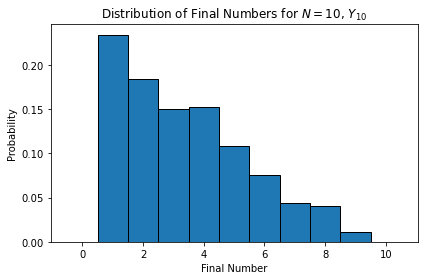

In [252]:
def plot_sim(n):
    sim_results = hat_numbers_unique_sim(n, num_iter=max(10*n, 1000))
    bins = np.arange(0, n+2) - 0.5 if len(np.arange(0, n+2) - 0.5) <= 100 else 100
    plt.hist(sim_results, density=True, bins=bins, edgecolor='black')  # Ensures integer bins
    plt.xlabel("Final Number")
    plt.ylabel("Probability")
    plt.title(f"Distribution of Final Numbers for $N={n}$, $Y_{{{n}}}$")
    
    # I set xticks to this for most of my graphs for lower N
    # plt.xticks(range(1, n + 1, 2))
    
    plt.tight_layout()
    plt.show()
    
# Test
plot_sim(10)